<a href="https://colab.research.google.com/github/nadyadtm/SignLanguageRecognition/blob/master/SignLanguageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language Recognition

Kali ini saya membuat sistem rekognisi pada citra isyarat tangan. Ini sangat menarik dan membantu orang yang ingin berkomunikasi dengan orang yang disabilitas karena bila di kembangkan lebih lanjut maka komputer akan dapat menerjemahkan apa yang ingin dikomunikasikan oleh orang tunarungu atau tunawicara. 

### Tentang Dataset

Dataset ini merupakan dataset berupa citra isyarat tangan yang terdiri dari 24 kelas, dimana pada dataset ini huruf J=9 dan huruf Z=25 tidak termasuk karena bila ingin membentuk abjad tersebut harus menggunakan gerakan, yang dimana kalau ingin mengenali gerakan lebih cocok menggunakan video. 

Contoh gerakan tangan yang dijelaskan pada dataset ini adalah sebagai berikut
<img src="https://miro.medium.com/max/998/1*pcmV9IpUhYhvpScQ1Q8W5A.png"/>

### Import Package yang dibutuhkan

Untuk sementara disini saya menggunakan 3 package terlebih dahulu

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

#### Mount Drive Google Colab

Karena saya menggunakan google colab jadi saya harus menggunakan code ini untuk mendapatkan izin akses file di google drive kita

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#### Load data csv

Setelah itu, saya melakukan load data csv

In [0]:
train = pd.read_csv("gdrive/My Drive/Data Science PortFolio/Portfolio 5/sign_mnist_train.csv")
test = pd.read_csv("gdrive/My Drive/Data Science PortFolio/Portfolio 5/sign_mnist_test.csv")

Data tersebut berbentuk sebagai berikut

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


#### Memisahkan data latih, data validasi dan data uji

In [0]:
X_train = train.drop(columns="label").values
y_train = train["label"].values
X_test = test.drop(columns="label").values
y_test = test["label"].values

In [0]:
X_train = np.array([np.reshape(i, (28, 28,1)) for i in X_train])
X_test = np.array([np.reshape(i, (28, 28,1)) for i in X_test])

In [7]:
print("Jumlah data train : ",X_train.shape[0])
print("Jumlah data test : ",X_test.shape[0])

Jumlah data train :  27455
Jumlah data test :  7172


In [8]:
#ambil data valid cukup 10000 aja
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =', X_val.shape)
print('y_val.shape   =', y_val.shape)
print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)

X_val.shape   = (10000, 28, 28, 1)
y_val.shape   = (10000,)
X_train.shape = (17455, 28, 28, 1)
y_train.shape = (17455,)


### Contoh Data yang digunakan

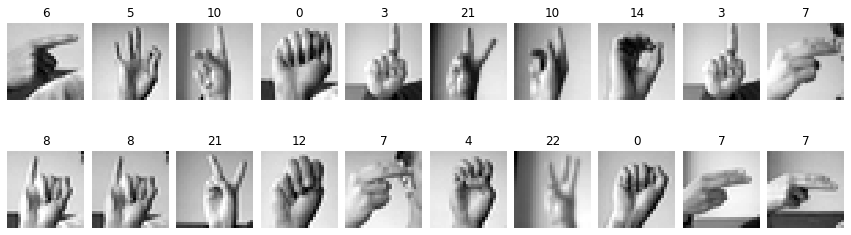

In [11]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_test[i+j*10].reshape((28,28)), cmap='gray')
        ax[j,i].set_title(y_test[i+j*10])
        ax[j,i].axis('off')
plt.show()

### Mari kita mulai buat sistem

#### One Hot Matrix

In [12]:
from tensorflow.keras.utils import to_categorical

# ubah label menjadi one hot matrix dengan memanggil fungsi to_categorical 10
# dengan mula-mula mengubah y menjadi 1 dimensi dengan fungsi ravel
y_train_hot = to_categorical(y_train.ravel())
y_val_hot = to_categorical(y_val.ravel())
y_test_hot = to_categorical(y_test.ravel())

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (17455, 25)
y_val_hot.shape   = (10000, 25)
y_test_hot.shape  = (7172, 25)


Contoh keluaran dari one hot matrix

In [13]:
#keluaran
y_train_hot[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Normalisasi Data (Dengan Zero-Mean)

In [14]:
#normalisasi
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

X_train.shape = (17455, 28, 28, 1)
X_val.shape   = (10000, 28, 28, 1)
X_test.shape  = (7172, 28, 28, 1)


#### Membuat Arsitektur CNN



In [0]:
#import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D

num_data    = X_train.shape[0]
X_dim       = X_train.shape[1]
num_classes = y_train_hot.shape[1]

In [16]:
model_cnn = Sequential([
  Conv2D(64,(3,3),input_shape=(28,28,1), padding='same', activation="selu"),
  Conv2D(64,(3,3),input_shape=(28,28,1), padding='same', activation="selu"),
  MaxPooling2D(),
  Conv2D(128,(3,3),input_shape=(28,28,1), padding='same', activation="selu"),
  Conv2D(128,(3,3),input_shape=(28,28,1), padding='same', activation="selu"),
  MaxPooling2D(),
  Flatten(),
  Dense(100, activation="selu"),
  Dense(num_classes, activation="softmax")
])

model_cnn.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d

#### Compile Arsiteksur

In [0]:
#menentukan loss dan optimizer
model_cnn.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#### Checkpoint CNN

In [0]:
#model checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
mycheckpoint = ModelCheckpoint('my_model.h5',
                              monitor='val_acc',
                              save_best_only=True)

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
myStopping = EarlyStopping(monitor='val_loss',
                          patience=5)

#### Langsung saja kita latih

In [20]:
num_epochs = 15
batch_size = 1000

hist_cnn = model_cnn.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Train on 17455 samples, validate on 10000 samples
Epoch 1/15
17455/17455 - 13s - loss: 9.3873 - acc: 0.0940 - val_loss: 3.5709 - val_acc: 0.1353
Epoch 2/15
17455/17455 - 4s - loss: 2.5785 - acc: 0.3150 - val_loss: 1.4278 - val_acc: 0.5681
Epoch 3/15
17455/17455 - 4s - loss: 0.8176 - acc: 0.7428 - val_loss: 0.3687 - val_acc: 0.8817
Epoch 4/15
17455/17455 - 4s - loss: 0.1975 - acc: 0.9498 - val_loss: 0.1007 - val_acc: 0.9784
Epoch 5/15
17455/17455 - 4s - loss: 0.0533 - acc: 0.9928 - val_loss: 0.0292 - val_acc: 0.9979
Epoch 6/15
17455/17455 - 4s - loss: 0.0186 - acc: 0.9993 - val_loss: 0.0163 - val_acc: 0.9987
Epoch 7/15
17455/17455 - 4s - loss: 0.0095 - acc: 1.0000 - val_loss: 0.0106 - val_acc: 0.9996
Epoch 8/15
17455/17455 - 4s - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 0.9997
Epoch 9/15
17455/17455 - 4s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.9998
Epoch 10/15
17455/17455 - 4s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 0.9999
Epoch 11

#### Evaluasi

In [21]:
scores_cnn = model_cnn.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_cnn[1]*100))

7172/7172 [==============================] - 1s 132us/sample - loss: 0.3611 - acc: 0.9159

Model Accuracy: 91.59%


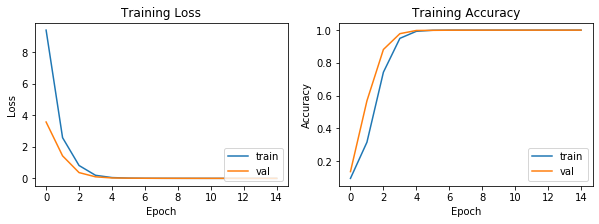

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(hist_cnn.history['loss'])
ax[0].plot(hist_cnn.history['val_loss'])
ax[0].set_title('Training Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(hist_cnn.history['acc'])
ax[1].plot(hist_cnn.history['val_acc'])
ax[1].set_title('Training Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()